In [ ]:
import pickle

with open('./figs/AachenDay_files/maxima_full/guidedbp/style_0_img_filter_indices_dict.txt','rb') as fp:
        filter_dic = pickle.load(fp)
    

Error: Jupyter cannot be started. Error attempting to locate jupyter: Data Science library notebook is not installed in interpreter Python 3.7.6 64-bit ('mapnet_release': conda).

In [44]:
filter_dic

{'layer1': {'block0': array([[138.,   2.],
         [232.,   2.],
         [340.,  61.],
         [ 66.,  53.],
         [100.,  26.],
         [327.,  39.],
         [ 68.,  26.],
         [ 58.,  59.]]),
  'block1': array([[343.,  26.],
         [340.,  61.],
         [218.,   2.],
         [ 15.,  26.],
         [340.,  53.],
         [ 58.,  51.],
         [256.,  28.],
         [256.,  53.]]),
  'block2': array([[141.,  26.],
         [ 45.,  60.],
         [321.,   2.],
         [177.,  60.],
         [321.,  28.],
         [185.,  21.],
         [  6.,   2.],
         [107.,  21.]])},
 'layer2': {'block0': array([[ 61.,  20.],
         [215.,   5.],
         [251.,  51.],
         [185.,  72.],
         [192.,   2.],
         [274.,   5.],
         [263.,   2.],
         [ 12.,   5.]]),
  'block1': array([[ 58.,  18.],
         [ 61.,  20.],
         [215.,   5.],
         [  7.,  18.],
         [150., 115.],
         [347.,   5.],
         [239.,   5.],
         [186.,   5.]]),

In [35]:
import numpy as np
feat_map_label = np.zeros((3,6,2))
for i in range(feat_map_label.shape[0]):
    feat_map_label[i,:,0] = i*np.ones(feat_map_label.shape[1])
    for j in range(feat_map_label.shape[1]):
        feat_map_label[i,j,1] = j  



In [40]:
feat_map_label.reshape(-1,2)

array([[0., 0.],
       [0., 1.],
       [0., 2.],
       [0., 3.],
       [0., 4.],
       [0., 5.],
       [1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.],
       [2., 0.],
       [2., 1.],
       [2., 2.],
       [2., 3.],
       [2., 4.],
       [2., 5.]])

In [30]:
a[1]

array([[[-0.,  0.,  0., -2.],
        [ 1., -0., -1., -1.],
        [-0.,  2., -1.,  1.],
        [ 1.,  0.,  0., -0.]],

       [[-1., -0., -0., -1.],
        [-1.,  2., -2.,  1.],
        [-0.,  1., -1.,  2.],
        [ 0., -0., -1.,  0.]]])

In [31]:
a.reshape(-1,4,4)[2]

array([[-0.,  0.,  0., -2.],
       [ 1., -0., -1., -1.],
       [-0.,  2., -1.,  1.],
       [ 1.,  0.,  0., -0.]])

In [2]:
import numpy as np 
a = np.ones((3,5,5))
a.transpose(1,2,0)

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [78]:
 def patches_grid(patches): # feat_map: (C, H, W, 1)
        # input patch : 9x3x50x50 or 9x3x100x100
        patches = patches.transpose(0,2,3,1)
        (B,H,W,C) = patches.shape
        cnt = 3
        G = np.ones((cnt * H + cnt+5, cnt * W + cnt+5 , C), patches.dtype)  # additional cnt for black cutting-lines
        G *= np.min(patches)

        n = 0
        for row in range(cnt):
            for col in range(cnt):
                if n < B:
                    # additional cnt for black cutting-lines
                    G[row * H + row : (row + 1) * H + row, col * W + col : (col + 1) * W + col, :] = patches[n, :, :, :]
                    n += 1

        # normalize to [0, 1]
        G = (G - G.min()) / (G.max() - G.min())

        return G

In [84]:
patches = np.random.randn(9,3,50,50)

G1 = patches_grid(patches)
G2 = patches_grid(patches)
G = np.concatenate((G1,G2),axis =1)


(-0.5, 315.5, 157.5, -0.5)

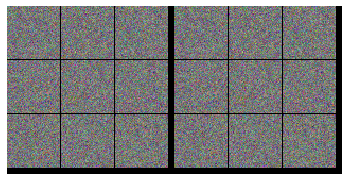

In [85]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(ncols=1)
ax.imshow(G)   # feat_map_grid: (ceil(sqrt(C)) * H, ceil(sqrt(C)) * W, 1)
plt.axis('off')

In [15]:
G.shape

(153, 153, 3)